# Import everything

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd
import qgrid


In [121]:
df=pd.read_csv('data\Data_Marketing_Customer_Analysis_Round3 latest.csv')

In [122]:

qgrid.show_grid(df,grid_options={'forceFitColumns': False})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

# Check multicollinearity

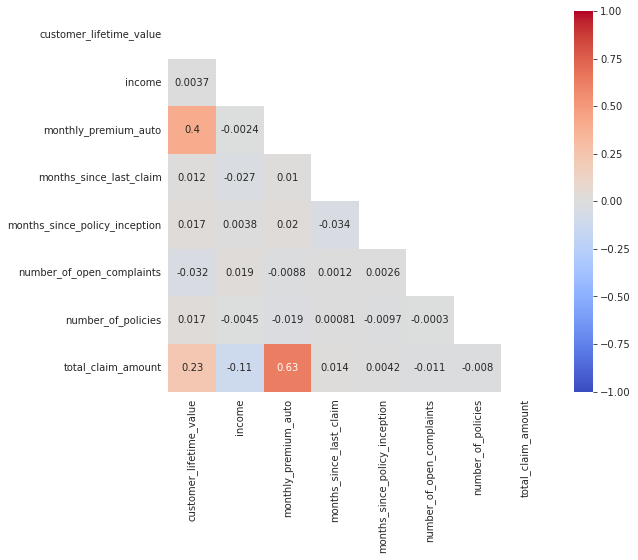

In [123]:
#check if there are highly correlated features and drop them if there are any.
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

# Hot Label Encode Variables

In [124]:
#Gather categorical variable column names
categoricals=df.select_dtypes(object)
categoricals
col_list=categoricals.columns

In [125]:
#Use get dummies to recode all categorical variables
categoricals=pd.get_dummies(data=categoricals,columns=col_list, drop_first=True)
categoricals

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


# Prepare numerical data

In [126]:
#get numericals
numericals=df._get_numeric_data()
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


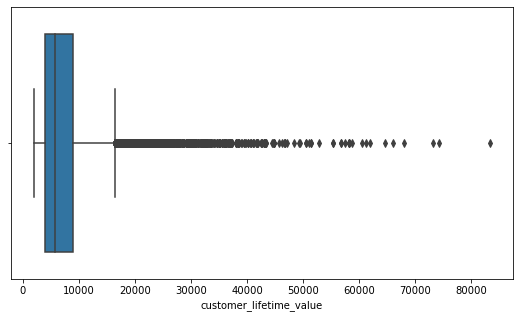

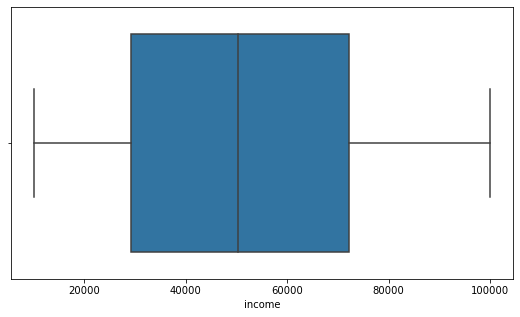

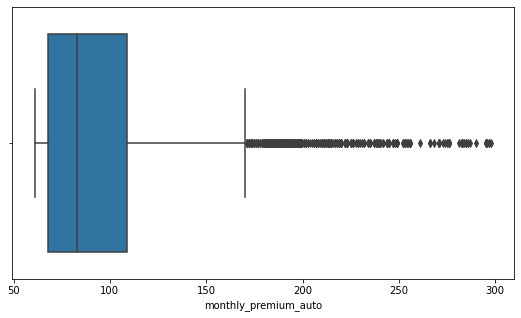

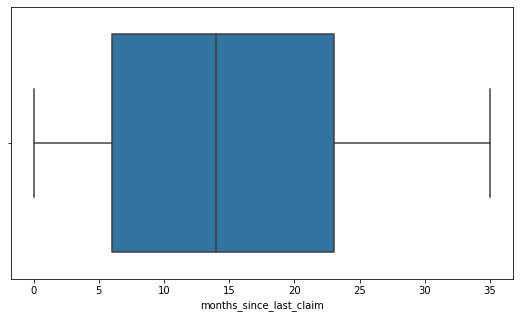

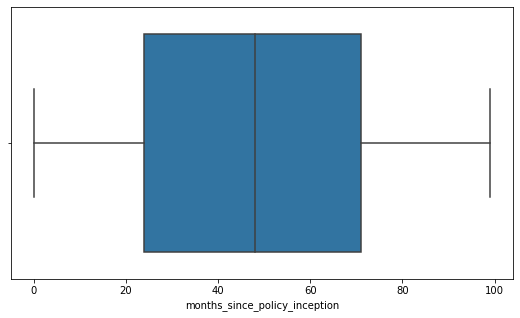

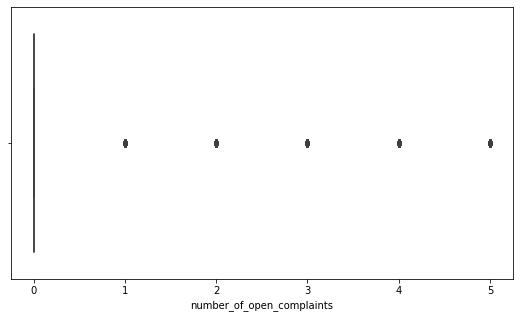

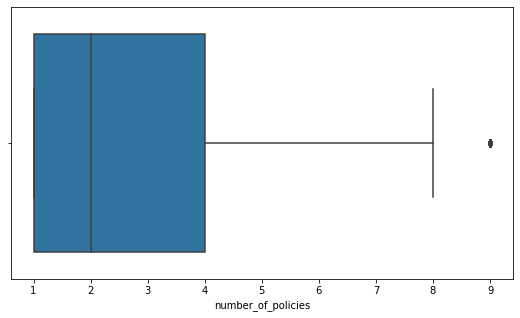

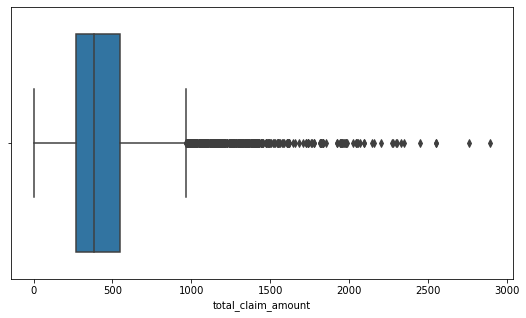

In [127]:
x=numericals.columns
for i in x:
    plt.figure(figsize=(9,5))
    sns.boxplot(x=i,data=numericals) 

In [128]:
#Remove outliers
def remove_outliers(df,col_list):
    for i in col_list:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        df.drop(df[ (df[i] > upper_bound) | (df[i] < lower_bound) ].index , inplace=True)

        return(df)


col_list=['number_of_policies']
remove_outliers(numericals,col_list)
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
5,4745,50549,61,2,73,0,7,292
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [92]:
#get independent variable
x=numericals['total_claim_amount']
x

0         292
1         744
2         480
3         484
4         707
         ... 
10684    1214
10685     273
10686     381
10687     618
10688    1021
Name: total_claim_amount, Length: 10689, dtype: int64

In [93]:
#get dependent variable
y=numericals.drop(labels='total_claim_amount',axis=1)
y

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,92260,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

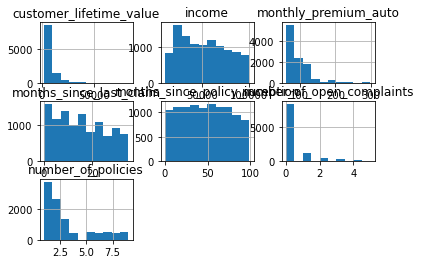

In [94]:
y.hist()